# GridPath Workshop (UCSB)

Initialization

In [1]:
import os
import sys
import pandas as pd

# Print the current working directory. The result should end with state_model
software_dir = os.getcwd()
os.chdir("..")
print(software_dir)

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [2]:
#Setting this as the primary directory for all future use
# This is be the main folder where all files are created and stored in. 
directory = os.getcwd()
print(directory)

/Users/Guille/Desktop/state_model


In [3]:
# Defining the database directory - where the database file will be created and stored. 
db_dir = f"{directory}/db"

# Defining CSV inputs directory - where the state level input files are stored. 
csv_dir = f"{directory}/input_csvs_gridpath"

#Defining scenario folder location
scen_dir = f"{directory}/scenarios"

# GridPath: Production Cost
The following section is for running a production cost model in GridPath.

## User edit section
Add the folder name with input csvs and provide a name for this database.

In [4]:
# Speciific  model for this run.
# Add the name of the specific mode folder file by replacing the worth between " " 
input_csvs_gridpath = "TN_2030-12-4_production"

# Add your database name below between "" or leave blank to use input_csvs_gridpath as database name
db_name = ""
db_name = db_name if db_name else input_csvs_gridpath
print(f"Database name is set to: {db_name}")

Database name is set to: TN_2030-12-4_production


## Creating database, importing state inputs and importing scenarios to the database for modeling

In [5]:
!python {directory}/gridpath/db/create_database.py --database {db_dir}/{db_name}.db
!python {directory}/gridpath/db/utilities/port_csvs_to_db.py --database {db_dir}/{db_name}.db --csv_location {csv_dir}/{input_csvs_gridpath}
!python {directory}/gridpath/db/utilities/scenario.py --database {db_dir}/{db_name}.db --csv_path {csv_dir}/{input_csvs_gridpath}/scenarios.csv

Importing data for subscenario solver_options_id, table options_solver from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_2030-12-4_production/solver...
...importing CSV 4_gurobi_4th_high_mipgap.csv
   ...importing data from 4_gurobi_4th_high_mipgap.csv
...importing CSV 1_glpk.csv
   ...importing data from 1_glpk.csv
...importing CSV 5_ipopt.csv
   ...importing data from 5_ipopt.csv
...importing CSV 3_cplex_high_mipgap.csv
   ...importing data from 3_cplex_high_mipgap.csv
...importing CSV 6_highs.csv
   ...importing data from 6_highs.csv
...importing CSV 2_cbc.csv
   ...importing data from 2_cbc.csv
Importing data for subscenario temporal_scenario_id, table temporal from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_2030-12-4_production/temporal...
...importing data from directory /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_2030-12-4_production/temporal/1_12days_2030_quaterly_timepoints
   ...importing data from nan
...importing data from directory /U

In [6]:
# This will print out all possible scenarios available
scenario_csv = pd.read_csv(f"{csv_dir}/{input_csvs_gridpath}/scenarios.csv")
column_names = scenario_csv.columns[1:]

# Print scenario names
print("Available scenarios:")
for name in column_names:
    print(name)

Available scenarios:
BAU_TN_2030-12-4_production


## Select scenarios from the list above and add to the `selected_scenario` below before running.

### User Edit Section

In [7]:
# Add or remove scenarios from above to the list below:
scen_list = ["BAU_TN_2030-12-4_production"]

### Running selected scenarios

In [8]:
for selected_scenario in scen_list:
    !python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario BAU_TN_2030-12-4_production end to end
Process ID is 17789
End-to-end run started on 2024-11-04 10:30:35.502903
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_2030-12-4_production.db)

Running optimization for scenario BAU_TN_2030-12-4_production
--- subproblem 1
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.12 
Build Date: Sep  3 2024 

command line - /Users/Guille/opt/anaconda3/envs/wri-py39/bin/cbc -prep sos -printingOptions all -import /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpw4m_zaa1.pyomo.lp -stat=1 -solve -solu /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpw4m_zaa1.pyomo.soln (default strategy 1)
Multiple matches for prep - possible completions:
PrepN(ames)
preprocess
Multiple matches for sos - possible completions:
sosO(ptions)
sosP(rioritize)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem 

# Visualization: Production Cost
The following section is for visualizing the results from the GridPath Production Cost model above.

In [9]:
# Checking the directory is correct - should be state_model folder
os.chdir(software_dir)
print(os.getcwd())

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [10]:
# loading packages and setting results folder
from loading_utils import * 
from plotting_utils import * 
from processing_utils import * 

path_to_scenarios = f"{directory}/scenarios"
print(path_to_scenarios)

/Users/Guille/Desktop/state_model/scenarios


Loading necessary functions for the zones, scenarios labels `<scenario_labels.csv>` and technology colors `<technology_labels.csv>` to plot the graph for new and existing capacity

In [11]:
scen_labels_     = pd.read_csv(directory + '/input_csvs_plotting/scenario_labels_production.csv') 
tech_labels_     = pd.read_csv(directory + '/input_csvs_plotting/technology_labels_production.csv') 
dispatch_labels_ = pd.read_csv(directory + '/input_csvs_plotting/dispatch_labels_production.csv') 

Load new and existing capacity across different scenarios, grouping the capacity by technology.

In [12]:
capacity_         = _load_capacity(scen_labels_, path_to_scenarios, gp_model = 'production')
grouped_capacity_ = _group_capacity_technologies(capacity_, tech_labels_)
grouped_capacity_.style

BAU_TN_2030-12-4_production


,Scenario,Period,Technology,Zone,Status,Power,Energy
0,BAU_TN_2030-12-4_production,2030,Battery,TANGEDCO,new,2500.000000,10000.000000
1,BAU_TN_2030-12-4_production,2030,Coal,TANGEDCO,new,14000.000000,0.000000
2,BAU_TN_2030-12-4_production,2030,Curtailment,TANGEDCO,new,0.000000,0.000000
3,BAU_TN_2030-12-4_production,2030,Gas,TANGEDCO,new,1000.000000,0.000000
4,BAU_TN_2030-12-4_production,2030,Hydro,TANGEDCO,new,5000.000000,0.000000
5,BAU_TN_2030-12-4_production,2030,Import,TANGEDCO,new,34000.000000,0.000000
6,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,new,600.000000,0.000000
7,BAU_TN_2030-12-4_production,2030,Other,TANGEDCO,new,356.000000,0.000000
8,BAU_TN_2030-12-4_production,2030,Pumped Storage,TANGEDCO,new,11000.000000,22000.000000
9,BAU_TN_2030-12-4_production,2030,Shedding,TANGEDCO,new,0.000000,0.000000


Plotting the new and existing capacity across different scenarios. Add title name for the plot.

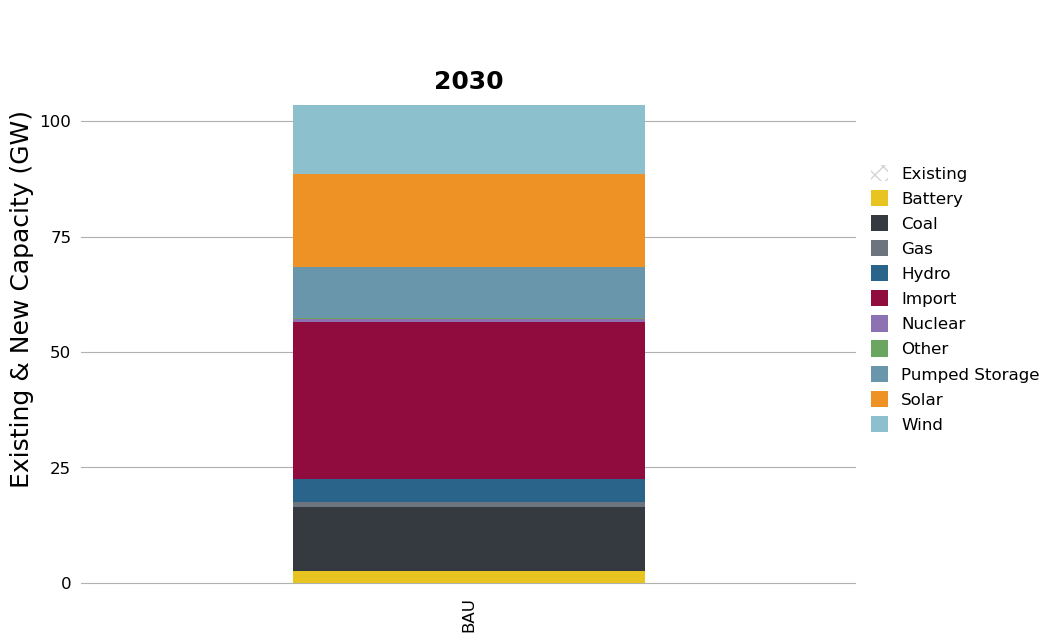

In [13]:
_plot_new_and_existing_capacity(grouped_capacity_, scen_labels_, tech_labels_,
                                units        = 1e3,
                                units_label  = 'Existing & New Capacity (GW)',
                                legend       = True,
                                save         = True,
                                y_grid_inc   = 25,
                                title        = '',
                                file_name    = directory + r'/plots/group_installed_capacity.png')

Energy dispatch by scenarios, zone and date

In [14]:
ed_ = _processing_energy_dispatch(scen_labels_, path_to_scenarios, model = 'production')
ed_ = _group_dispatch_technologies_by_zone_and_date_production(ed_, tech_labels_)
print(ed_)

BAU_TN_2030-12-4_production
     load_zone technology                     scenario   timepoint   power_mw
0     TANGEDCO    Battery  BAU_TN_2030-12-4_production  2029040101    0.00000
1     TANGEDCO    Battery  BAU_TN_2030-12-4_production  2029040102    0.00000
2     TANGEDCO    Battery  BAU_TN_2030-12-4_production  2029040103    0.00000
3     TANGEDCO    Battery  BAU_TN_2030-12-4_production  2029040104    0.00000
4     TANGEDCO    Battery  BAU_TN_2030-12-4_production  2029040105    0.00000
...        ...        ...                          ...         ...        ...
4219  TANGEDCO       Wind  BAU_TN_2030-12-4_production  2030010192  833.46453
4220  TANGEDCO       Wind  BAU_TN_2030-12-4_production  2030010193  829.68255
4221  TANGEDCO       Wind  BAU_TN_2030-12-4_production  2030010194  852.58455
4222  TANGEDCO       Wind  BAU_TN_2030-12-4_production  2030010195  875.48655
4223  TANGEDCO       Wind  BAU_TN_2030-12-4_production  2030010196  898.38853

[4224 rows x 5 columns]


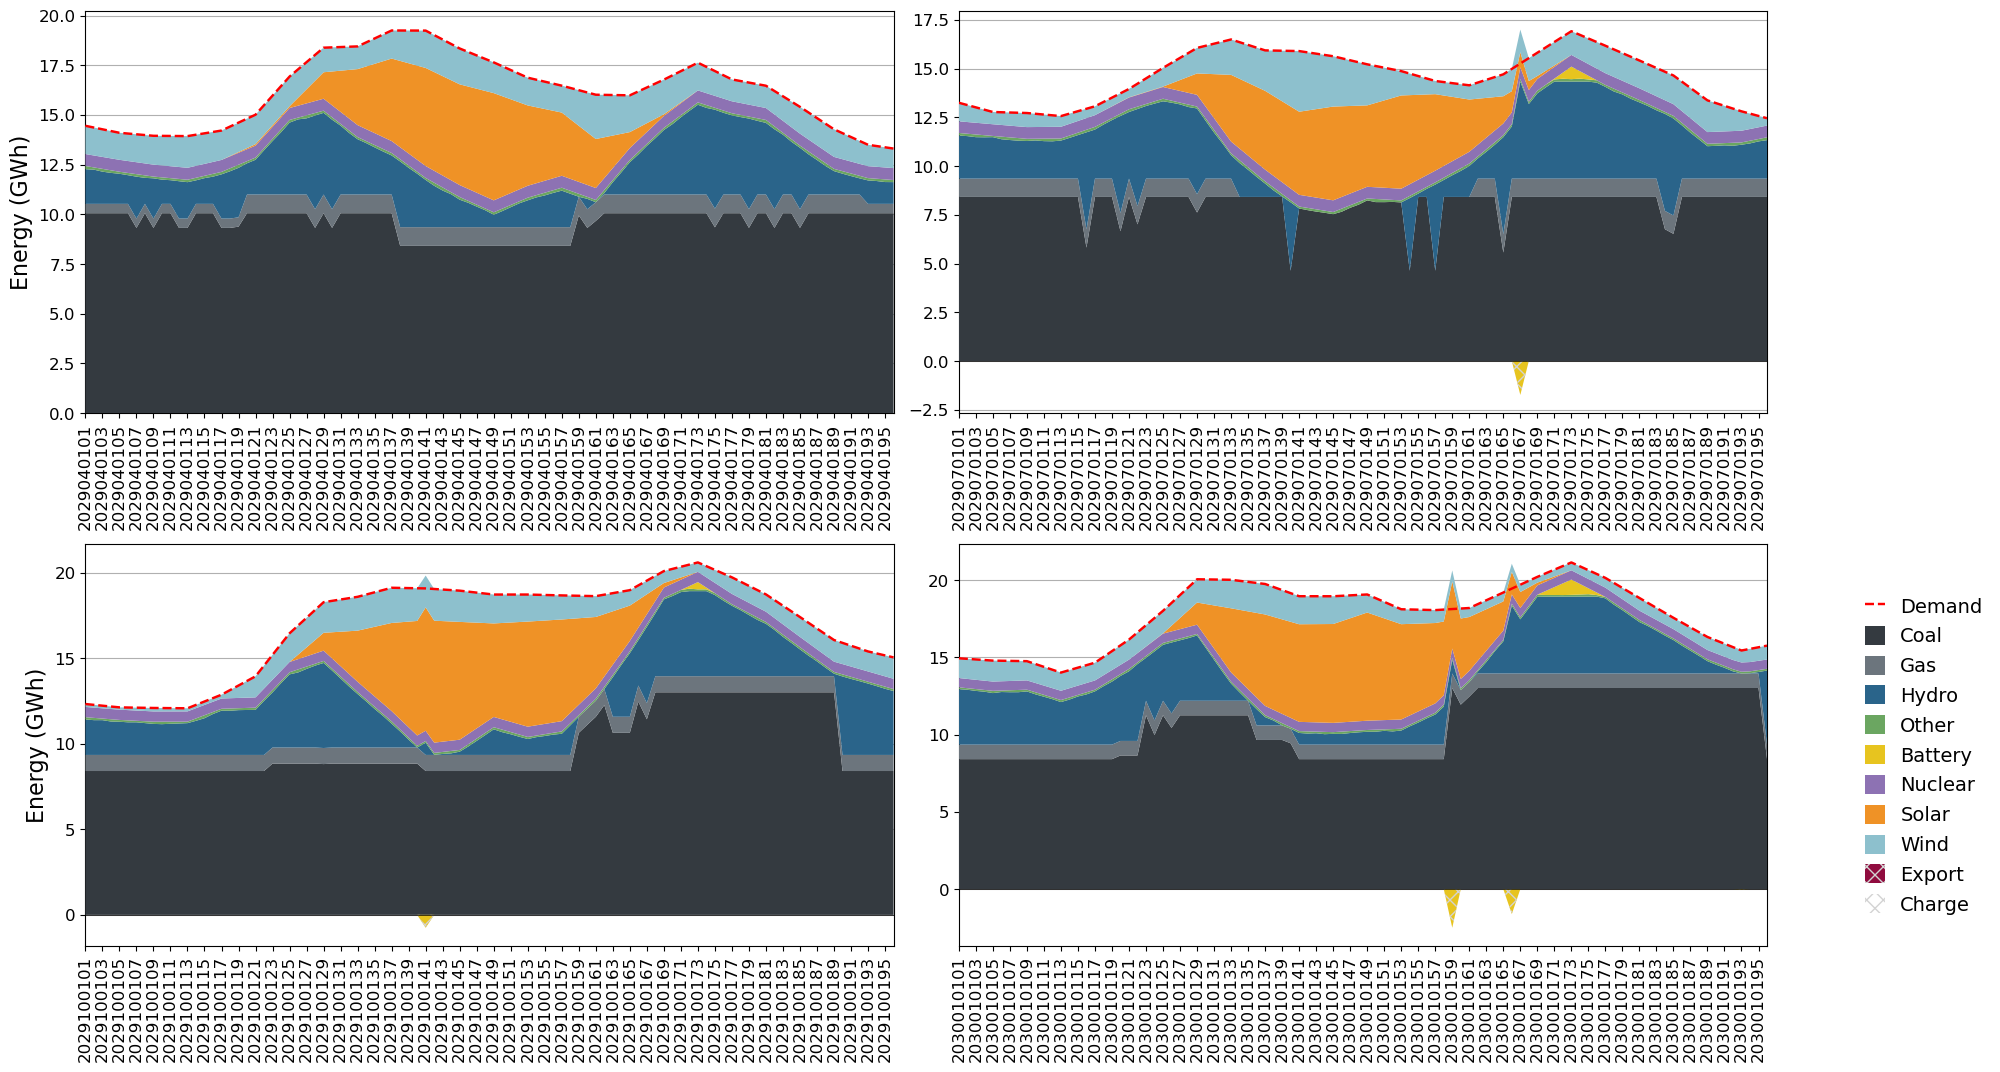

In [15]:
# Plot energy dispatch for a given day
_plot_zone_energy_dispatch_production(ed_, scen_labels_, tech_labels_, dispatch_labels_,
                                      save      = True,
                                      legend    = True,
                                      file_name = directory + r'/plots/energy_dispatch.png')

Load energy dispatch across scenarios and group the energy dispatch by technology

In [16]:
dispatch_         = _load_energy_dispatch(scen_labels_, path_to_scenarios, gp_model = 'production')
grouped_dispatch_ = _group_dispatch_technologies(dispatch_, tech_labels_)
grouped_dispatch_.style

BAU_TN_2030-12-4_production


,Scenario,Period,Technology,Zone,Energy
0,BAU_TN_2030-12-4_production,2030,Coal,TANGEDCO,83445897.334373
1,BAU_TN_2030-12-4_production,2030,Gas,TANGEDCO,7387371.875000
2,BAU_TN_2030-12-4_production,2030,Import,TANGEDCO,0.000000
3,BAU_TN_2030-12-4_production,2030,Hydro,TANGEDCO,20883442.469343
4,BAU_TN_2030-12-4_production,2030,Other,TANGEDCO,1064865.035756
5,BAU_TN_2030-12-4_production,2030,Battery,TANGEDCO,-14813.089245
6,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,5256000.000000
7,BAU_TN_2030-12-4_production,2030,Pumped Storage,TANGEDCO,0.000000
8,BAU_TN_2030-12-4_production,2030,Solar,TANGEDCO,15030776.476169
9,BAU_TN_2030-12-4_production,2030,Wind,TANGEDCO,10918569.682784


Plotting energy dispatch per technology for different scenarios

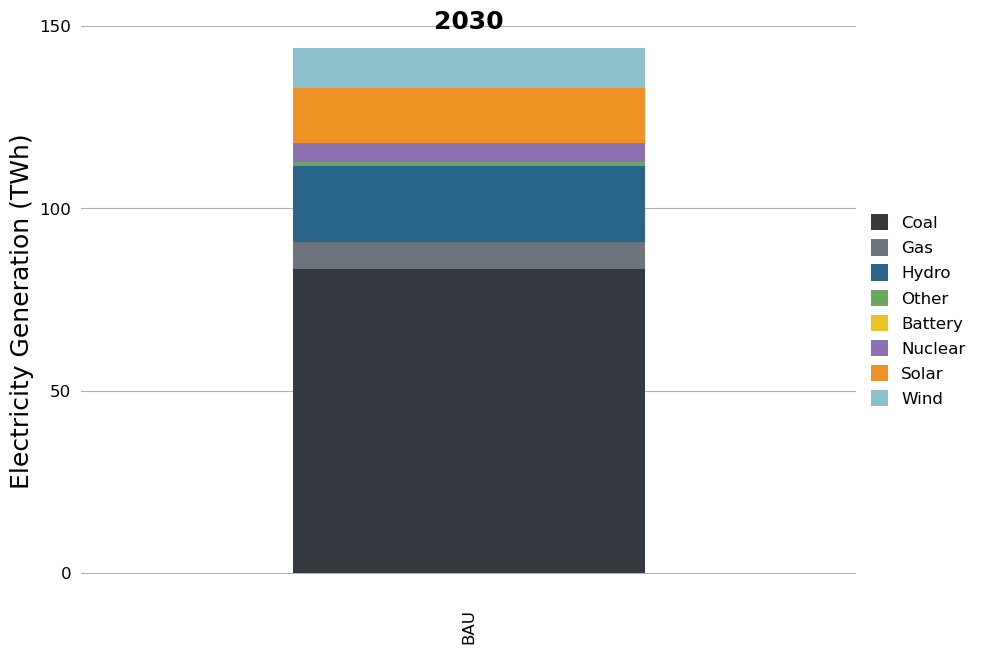

In [17]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_dispatch(grouped_dispatch_, scen_labels_,  tech_labels_, 
               units        = 1e6, 
               units_label  = r'Electricity Generation (TWh)',
               save         = True,
               legend       = True,
               y_grid_inc   = 50,
               title        = '',
               file_name    = directory + r'/plots/group_electricity_generation.png')

Load Greenhouse Gas (GHG) emissions and load energy demand for different scenarios

In [18]:
emissions_, demand_ = _load_GHG_emissions(scen_labels_, path_to_scenarios, gp_model = 'production')
emissions_.style

BAU_TN_2030-12-4_production


,Scenario,Period,Technology,Zone,GHG
0,BAU_TN_2030-12-4_production,2030,Bagasse,TANGEDCO,0.000000
1,BAU_TN_2030-12-4_production,2030,Battery,TANGEDCO,0.000000
2,BAU_TN_2030-12-4_production,2030,Central_Coal,TANGEDCO,69263284.465080
3,BAU_TN_2030-12-4_production,2030,Genco_Coal,TANGEDCO,11314899.599742
4,BAU_TN_2030-12-4_production,2030,Genco_Gas,TANGEDCO,3289738.156250
5,BAU_TN_2030-12-4_production,2030,Genco_Hydro,TANGEDCO,0.000000
6,BAU_TN_2030-12-4_production,2030,Hydro_PS,TANGEDCO,0.000000
7,BAU_TN_2030-12-4_production,2030,Market_FlexibleGen,TANGEDCO,0.000000
8,BAU_TN_2030-12-4_production,2030,Nuclear,TANGEDCO,0.000000
9,BAU_TN_2030-12-4_production,2030,Solar,TANGEDCO,0.000000


Plot GHG emissions for different scenarios

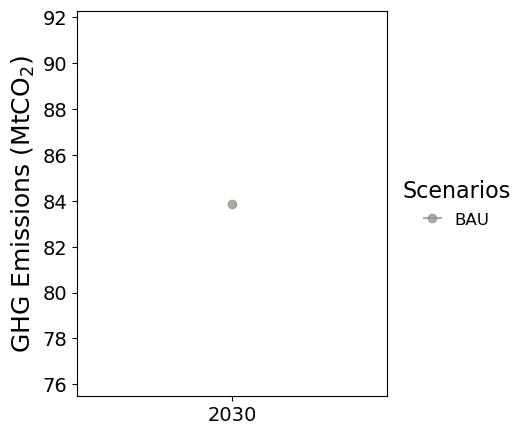

In [19]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions(emissions_, scen_labels_, 
                units      = 1e6,
                unit_label = r'GHG Emissions (MtCO$_2$)',
                save       = True,
                legend     = True,
                title      = '',
                file_name  = directory + r'/plots/GHG_emissions.png')

Processing GHG emissions intensity for different scenarios

In [20]:
intesity_, demand_ = _GHG_emissions_intensity(emissions_, demand_)
intesity_.style

BAU_TN_2030-12-4_production


,Scenario,Zone,Period,GHG,Load,Intensity
0,BAU_TN_2030-12-4_production,TANGEDCO,2030,83867922.221072,143972109.731250,0.582529


Plot GHG emissions intensity for different scenarios

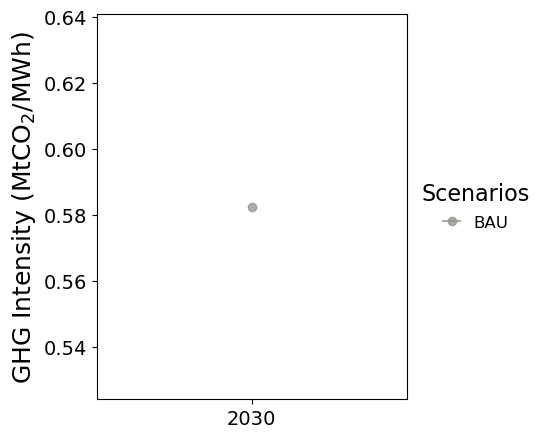

In [21]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions_intensity(intesity_, scen_labels_, 
                          unit_label = r'GHG Intensity (MtCO$_2$/MWh)',
                          save       = True,
                          legend     = True,
                          title      = '',
                          file_name  = directory + r'/plots/GHG_emissions_intensity.png')

Load system cost data for different scenarios

In [22]:
system_cost_ = _load_system_cost(scen_labels_, path_to_scenarios, gp_model = 'production')
system_cost_.style

BAU_TN_2030-12-4_production


,Scenario,Period,Zone,Variable_Costs,Fix_Costs,Load,Cost,LCOE
0,BAU_TN_2030-12-4_production,2030,TANGEDCO,31165839523.465626,438969253160.0,143972109.731250,470135092683.465637,3265.459495


Plot system Levelized Cosst of Electricity (LCOE) for different scenarios

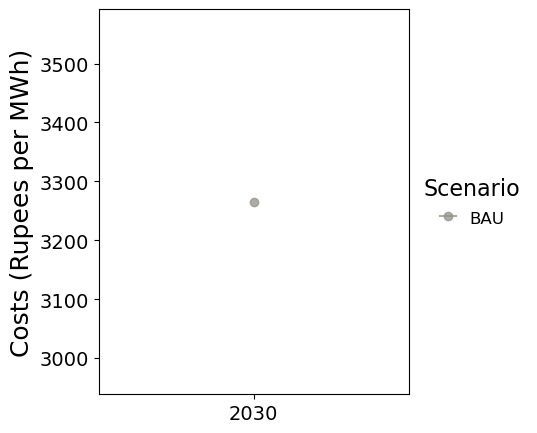

In [23]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_system_cost(system_cost_, scen_labels_, 
                  unit_label = r'Costs (Rupees per MWh)', 
                  save       = True, 
                  legend     = True,
                  title      = '', 
                  file_name  = directory + r'/plots/system_cost.png')

In [26]:
# Replace with a specific scenario if needed, otherwise leave blank
scenario = 'BAU_TN_2030-12-4_production' 
# Replace with 'new' or existing' so only new capacity is shown, otherwise leave blank for new and existing
status = '' 
filtered_capacity_ = _filter_capacity(grouped_capacity_, scenario = '', status = '')
filtered_capacity_.style

Scenario,Technology,BAU_TN_2030-12-4_production
Period,,2030
0,Battery,2500.000000
1,Coal,14000.000000
2,Curtailment,0.000000
3,Gas,1000.000000
4,Hydro,5000.000000
5,Import,34000.000000
6,Nuclear,600.000000
7,Other,356.000000
8,Pumped Storage,11000.000000
